In [1]:
import json
import pandas as pd
import re
import altair as alt

In [2]:
with open("../data/processed/article_transcripts.json", "r", encoding="utf-8") as f:
    data = json.load(f)

In [3]:
print(len(data))
print(data[0].keys())

531
dict_keys(['date', 'title', 'url', 'transcript'])


In [4]:
def parse_spanish_date(raw_date):
    """
    Convert a messy Spanish date string (e.g., 
    'jueves, 16 de octubre de 2025Fecha de publicación')
    into a standard datetime.date object.
    """
    if not isinstance(raw_date, str):
        return pd.NaT

    # 1. Clean unwanted text
    clean = raw_date.lower()
    clean = re.sub(r"fecha.*", "", clean).strip()  # remove "Fecha de publicación" and after
    clean = re.sub(r"[,]", "", clean)  # remove commas

    # 2. Map Spanish month names to numbers
    months = {
        "enero": 1, "febrero": 2, "marzo": 3, "abril": 4,
        "mayo": 5, "junio": 6, "julio": 7, "agosto": 8,
        "septiembre": 9, "setiembre": 9, "octubre": 10,
        "noviembre": 11, "diciembre": 12
    }

    # 3. Extract day, month, year
    pattern = r"(\d{1,2})\s+de\s+([a-záéíóú]+)\s+de\s+(\d{4})"
    match = re.search(pattern, clean)
    if not match:
        return pd.NaT

    day = int(match.group(1))
    month_str = match.group(2)
    year = int(match.group(3))

    # 4. Normalize month
    month = months.get(month_str, None)
    if not month:
        return pd.NaT

    # 5. Return datetime
    try:
        return pd.Timestamp(year=year, month=month, day=day).date()
    except Exception:
        return pd.NaT

In [5]:
# Flatten transcript-level data
rows = []
for article in data:
    for t in article["transcript"]:
        rows.append({
            "date": parse_spanish_date(article["date"]),
            "title": article["title"],
            "url": article["url"],
            "speaker": t["speaker"],
            "text": t["text"]
        })

df = pd.DataFrame(rows)

# Forward fill missing speaker names
df["speaker"] = df["speaker"].ffill()

df.head(20)

,date,title,url,speaker,text
0,2025-10-16,Versión estenográfica. Mensaje de la President...,https://www.gob.mx/presidencia/es/articulos/ve...,"PRESIDENTA DE MÉXICO, CLAUDIA SHEINBAUM PARDO:","PRESIDENTA DE MÉXICO, CLAUDIA SHEINBAUM PARDO:..."
1,2025-10-16,Versión estenográfica. Mensaje de la President...,https://www.gob.mx/presidencia/es/articulos/ve...,"PRESIDENTA DE MÉXICO, CLAUDIA SHEINBAUM PARDO:",Fueron 108 municipios afectados.
2,2025-10-16,Versión estenográfica. Mensaje de la President...,https://www.gob.mx/presidencia/es/articulos/ve...,"PRESIDENTA DE MÉXICO, CLAUDIA SHEINBAUM PARDO:",Y quiero platicarles qué hemos estado haciendo...
3,2025-10-16,Versión estenográfica. Mensaje de la President...,https://www.gob.mx/presidencia/es/articulos/ve...,"PRESIDENTA DE MÉXICO, CLAUDIA SHEINBAUM PARDO:","El viernes, después de estas lluvias intensas,..."
4,2025-10-16,Versión estenográfica. Mensaje de la President...,https://www.gob.mx/presidencia/es/articulos/ve...,"PRESIDENTA DE MÉXICO, CLAUDIA SHEINBAUM PARDO:",Las afectaciones fueron diversas: en algunos l...
5,2025-10-16,Versión estenográfica. Mensaje de la President...,https://www.gob.mx/presidencia/es/articulos/ve...,"PRESIDENTA DE MÉXICO, CLAUDIA SHEINBAUM PARDO:",¿Cómo hemos venido trabajando todo este tiempo?
6,2025-10-16,Versión estenográfica. Mensaje de la President...,https://www.gob.mx/presidencia/es/articulos/ve...,"PRESIDENTA DE MÉXICO, CLAUDIA SHEINBAUM PARDO:","Fíjense, nosotros tenemos lo que llamamos un S..."
7,2025-10-16,Versión estenográfica. Mensaje de la President...,https://www.gob.mx/presidencia/es/articulos/ve...,"PRESIDENTA DE MÉXICO, CLAUDIA SHEINBAUM PARDO:",En este sistema podemos mapear cada uno de los...
8,2025-10-16,Versión estenográfica. Mensaje de la President...,https://www.gob.mx/presidencia/es/articulos/ve...,"PRESIDENTA DE MÉXICO, CLAUDIA SHEINBAUM PARDO:","Hasta ahora hay, 160 localidades a las que tod..."
9,2025-10-16,Versión estenográfica. Mensaje de la President...,https://www.gob.mx/presidencia/es/articulos/ve...,"PRESIDENTA DE MÉXICO, CLAUDIA SHEINBAUM PARDO:","Hay 47 helicópteros de Defensa, de Marina, de ..."


In [6]:
# Number of mañaneras collected
len(df["date"].unique())

349

<Axes: title={'center': 'Total words per mañanera'}, xlabel='date'>

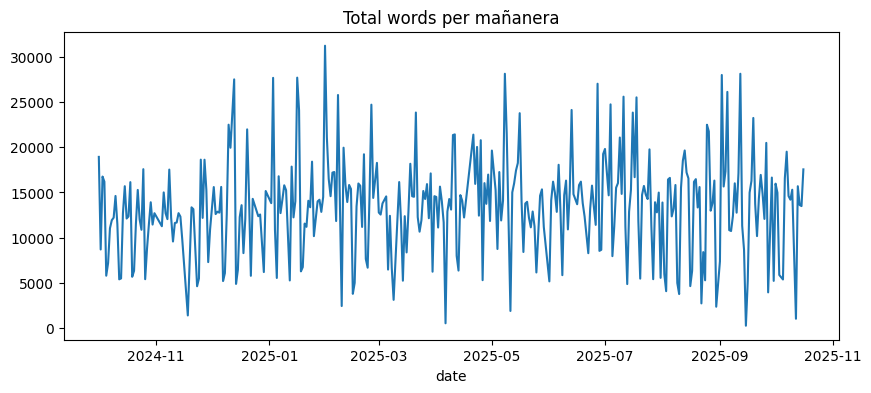

In [7]:
# Word count per article
df["word_count"] = df["text"].apply(lambda x: len(str(x).split()))
df.groupby("date")["word_count"].sum().plot(kind="line", figsize=(10,4), title="Total words per mañanera")

In [8]:
def get_conference_lengths(df):
    """
    Compute length (word count) for each unique speech (title/url) and date.
    
    Args:
        df (pd.DataFrame): Must contain columns ['date', 'title', 'url', 'text']
    Returns:
        pd.DataFrame: tidy DataFrame with ['date', 'title', 'url', 'length_words']
    """
    df = df.copy()
    df["date"] = pd.to_datetime(df["date"], errors="coerce")
    df = df.dropna(subset=["text"])

    # Compute word count per paragraph
    df["word_count"] = df["text"].apply(lambda x: len(str(x).split()))

    # Aggregate by date + title + url
    result = (
        df.groupby(["date", "title", "url"], as_index=False)["word_count"]
          .sum()
          .rename(columns={"word_count": "length_words"})
          .sort_values(["date", "title"])
          .reset_index(drop=True)
    )
    return result


In [9]:
df_lengths = get_conference_lengths(df)
df_lengths

,date,title,url,length_words
0,2024-10-01,Versión estenográfica. Mensaje de la president...,https://www.gob.mx/presidencia/es/articulos/ve...,5879
1,2024-10-01,Versión estenográfica. Toma de protesta ante e...,https://www.gob.mx/presidencia/es/articulos/ve...,8279
2,2024-10-01,Versión estenográfica. Toma de protesta de Cla...,https://www.gob.mx/presidencia/es/articulos/ve...,4778
3,2024-10-02,Versión estenográfica. Conferencia de prensa d...,https://www.gob.mx/presidencia/es/articulos/ve...,8698
4,2024-10-03,Versión estenográfica. Conferencia de prensa d...,https://www.gob.mx/presidencia/es/articulos/ve...,11633
...,...,...,...,...
509,2025-10-13,Versión estenográfica. Conferencia de prensa d...,https://www.gob.mx/presidencia/es/articulos/ve...,15692
510,2025-10-14,Versión estenográfica. Conferencia de prensa d...,https://www.gob.mx/presidencia/es/articulos/ve...,13617
511,2025-10-15,Versión estenográfica. Conferencia de prensa d...,https://www.gob.mx/presidencia/es/articulos/ve...,13498
512,2025-10-16,Versión estenográfica. Conferencia de prensa d...,https://www.gob.mx/presidencia/es/articulos/ve...,16777


In [10]:
daily_lengths = (
    df_lengths.groupby("date", as_index=False)["length_words"].sum()
               .rename(columns={"length_words": "total_words_per_day"})
)
daily_lengths

,date,total_words_per_day
0,2024-10-01,18936
1,2024-10-02,8698
2,2024-10-03,16762
3,2024-10-04,16195
4,2024-10-05,5800
...,...,...
344,2025-10-12,1037
345,2025-10-13,15692
346,2025-10-14,13617
347,2025-10-15,13498


In [11]:
# Ensure datetime
daily = daily_lengths
daily["date"] = pd.to_datetime(daily["date"])

# Extract calendar features
daily["year"] = daily["date"].dt.year
daily["week"] = daily["date"].dt.isocalendar().week
daily["month"] = daily["date"].dt.month_name()
daily["day_of_week"] = daily["date"].dt.day_name()

# Order days for better readability
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

daily["day_of_week"] = pd.Categorical(daily["day_of_week"], categories=day_order, ordered=True)
daily["month"] = pd.Categorical(daily["month"], categories=month_order, ordered=True)


In [12]:
daily

,date,total_words_per_day,year,week,month,day_of_week
0,2024-10-01,18936,2024,40,October,Tuesday
1,2024-10-02,8698,2024,40,October,Wednesday
2,2024-10-03,16762,2024,40,October,Thursday
3,2024-10-04,16195,2024,40,October,Friday
4,2024-10-05,5800,2024,40,October,Saturday
...,...,...,...,...,...,...
344,2025-10-12,1037,2025,41,October,Sunday
345,2025-10-13,15692,2025,42,October,Monday
346,2025-10-14,13617,2025,42,October,Tuesday
347,2025-10-15,13498,2025,42,October,Wednesday


In [13]:
chart = (
    alt.Chart(daily_lengths)
    .mark_rect(stroke='white')
    .encode(
        x=alt.X("day_of_week:N", title=" ", sort=cat_order),
        y=alt.Y("week:N", title="Week Number"),
        color=alt.Color(
            "total_words_per_day:Q",
            scale=alt.Scale(scheme="blues"),
            title="Words per day"
        ),
    )
    .properties(
        title="Length of Claudia Sheinbaum’s Conferences (Words per Day)",
        width=600,
        height=900,
    )
)

chart

NameError: name 'cat_order' is not defined

In [80]:
daily = df_lengths.copy()
daily["date"] = pd.to_datetime(daily["date"], errors="coerce")
daily["week"] = daily["date"].dt.isocalendar().week

# weekday index 0..6 (Mon..Sun)
day_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
day_to_idx = {d:i for i, d in enumerate(day_order)}
daily["day_of_week"] = daily["date"].dt.day_name()
daily["day_idx"] = daily["day_of_week"].map(day_to_idx)

# rank conferences within the same date and total per date
daily["conf_rank"] = daily.groupby("date").cumcount() + 1
daily["n_conf"] = daily.groupby("date")["title"].transform("count")

# compute horizontal slice bounds inside the day cell
# e.g., for two conferences on a Tuesday (idx=1): slices are [1+0/2, 1+1/2] and [1+1/2, 1+2/2]
daily["x0"] = daily["day_idx"] + (daily["conf_rank"] - 1) / daily["n_conf"]
daily["x1"] = daily["day_idx"] + daily["conf_rank"] / daily["n_conf"]

# rename for clarity
daily = daily.rename(columns={"length_words": "words"})

In [81]:
daily

,date,title,url,words,week,day_of_week,day_idx,conf_rank,n_conf,x0,x1
0,2024-10-01,Versión estenográfica. Mensaje de la president...,https://www.gob.mx/presidencia/es/articulos/ve...,5879,40,Tuesday,1,1,3,1.000000,1.333333
1,2024-10-01,Versión estenográfica. Toma de protesta ante e...,https://www.gob.mx/presidencia/es/articulos/ve...,8279,40,Tuesday,1,2,3,1.333333,1.666667
2,2024-10-01,Versión estenográfica. Toma de protesta de Cla...,https://www.gob.mx/presidencia/es/articulos/ve...,4778,40,Tuesday,1,3,3,1.666667,2.000000
3,2024-10-02,Versión estenográfica. Conferencia de prensa d...,https://www.gob.mx/presidencia/es/articulos/ve...,8698,40,Wednesday,2,1,1,2.000000,3.000000
4,2024-10-03,Versión estenográfica. Conferencia de prensa d...,https://www.gob.mx/presidencia/es/articulos/ve...,11633,40,Thursday,3,1,2,3.000000,3.500000
...,...,...,...,...,...,...,...,...,...,...,...
509,2025-10-13,Versión estenográfica. Conferencia de prensa d...,https://www.gob.mx/presidencia/es/articulos/ve...,15692,42,Monday,0,1,1,0.000000,1.000000
510,2025-10-14,Versión estenográfica. Conferencia de prensa d...,https://www.gob.mx/presidencia/es/articulos/ve...,13617,42,Tuesday,1,1,1,1.000000,2.000000
511,2025-10-15,Versión estenográfica. Conferencia de prensa d...,https://www.gob.mx/presidencia/es/articulos/ve...,13498,42,Wednesday,2,1,1,2.000000,3.000000
512,2025-10-16,Versión estenográfica. Conferencia de prensa d...,https://www.gob.mx/presidencia/es/articulos/ve...,16777,42,Thursday,3,1,2,3.000000,3.500000


In [17]:
cat_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

chart = (
    alt.Chart(daily_lengths).mark_rect(stroke='white').encode(
        x=alt.X("day_of_week:N", title=" ", sort=cat_order), 
        y=alt.Y("week:N", title="Week Number"), 
        color=alt.Color("total_words_per_day:Q",
                        scale=alt.Scale(scheme="blues"),
                        title="Words per day"
                        ),
                        tooltip=["date:T", "words:Q"]
                        )
                        .properties(
                            title="Length of Claudia Sheinbaum’s Conferences (Words per Day)", 
                            width=600, height=900,))
chart

alt.Chart(...)

In [86]:
# axis labels for the quantitative x (0..6 → Mon..Sun)
tick_vals = list(range(7))
label_expr = "['Mon','Tue','Wed','Thu','Fri','Sat','Sun'][datum.value]"

chart = (
    alt.Chart(daily)
    .mark_rect(stroke='white')
    .encode(
        # quantitative start/end to fully control each slice width
        x=alt.X('x0:Q',
                title='Day of Week',
                scale=alt.Scale(domain=[-0.001, 6.999]),  # exactly 7 day cells
                axis=alt.Axis(values=tick_vals, labelExpr=label_expr)),
        x2='x1:Q',
        y=alt.Y('week:O', title='Week Number'),
        color=alt.Color('words:Q',
                        title='Words per conference',
                        scale=alt.Scale(scheme='blues')),
        tooltip=[
            alt.Tooltip('date:T', title='Date'),
            alt.Tooltip('title:N', title='Title'),
            alt.Tooltip('words:Q', title='Word count', format=','),
            alt.Tooltip('n_conf:Q', title='# conferences that day')
        ]
    )
    .properties(
        title="Length of Claudia Sheinbaum’s Conferences (Equal Horizontal Splits per Day)",
        width=600,
        height=900
    )
)
chart

alt.Chart(...)

In [ ]:
#Who speaks how much
df["speaker_type"] = df["speaker"].fillna("").apply(
    lambda s: "Presidenta" if "PRESIDENTA" in s.upper() else ("Pregunta" if "PREGUNTA" in s.upper() else "Other")
)

df.groupby("speaker_type")["word_count"].sum()

speaker_type
Other         2282895
Pregunta       224648
Presidenta    2185037
Name: word_count, dtype: int64